# Credit Card Fraud Detection

## Aim :
- To classify whether a credit card transaction is fradulent or genuine and handle unbalanced dataset.
- It is a **binary classification** problem with highly unbalanced data.

### Dataset Attributes
    
- **V1 - V28** : Are numerical features.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

### Notebook Contents :
- Dataset Information
- Data Visualization
- Feature Selection
- Data Balancing
- Modeling
- Conclusion

### What you will learn :
- Data Balancing using SMOTE.
- Statistical Tests for Feature Selection.
- Model comparison based on features selected based on statistical tests. 
- Modeling and visualization of results for algorithms.

Import the Necessary Libraries :

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

The dataset has been downloaded from the kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [13]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


## 1. Data cleaning :

In [15]:
df.shape

(284807, 31)

31 features and 284807 number of records

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Find the nulls in the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no nulls in the dataset

### Drop the duplicate records in the dataset


In [25]:
df = df.drop_duplicates()
print("DataFrame after removing duplicates:")
df.shape

DataFrame after removing duplicates:


(283726, 31)

In [27]:
data=df

<Axes: >

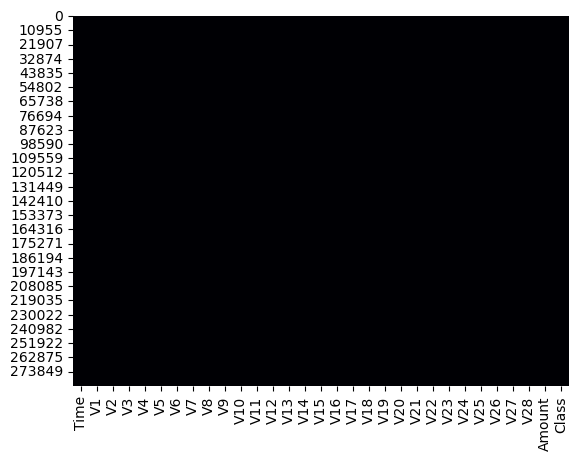

In [29]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

- **No null values** present in the data!

In [32]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,...,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00,283726.00
mean,94811.08,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,88.47,0.00
std,47481.05,1.95,1.65,1.51,1.41,1.38,1.33,1.23,1.18,1.10,...,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.40,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54204.75,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.50,0.02,0.06,0.18,-0.02,-0.05,-0.28,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139298.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.51,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [33]:
data[data['Class'] == 1].shape

(473, 31)

In [36]:
data[data['Class'] == 0].shape

(283253, 31)

Its an imbalanced dataset which contains: 492-class ==1 records and 284315-class ==o records

In [49]:
 f= data[data['Class'] == 1].describe().T
f

,count,mean,std,min,25%,50%,75%,max
Time,473.00,80450.51,48636.18,406.00,41203.00,73408.00,129095.00,170348.00
V1,473.00,-4.50,6.59,-30.55,-5.60,-2.27,-0.36,2.13
V2,473.00,3.41,4.12,-8.40,1.15,2.62,4.57,22.06
V3,473.00,-6.73,6.91,-31.10,-7.93,-4.88,-2.17,2.25
V4,473.00,4.47,2.87,-1.31,2.29,4.10,6.29,12.11
V5,473.00,-2.96,5.28,-22.11,-4.28,-1.37,0.26,11.10
V6,473.00,-1.43,1.72,-6.41,-2.45,-1.42,-0.41,6.47
V7,473.00,-5.18,6.86,-43.56,-6.99,-2.90,-0.91,5.80
V8,473.00,0.95,5.59,-41.04,-0.16,0.62,1.71,20.01
V9,473.00,-2.52,2.47,-13.43,-3.80,-2.10,-0.79,3.35


Imbalance dataset

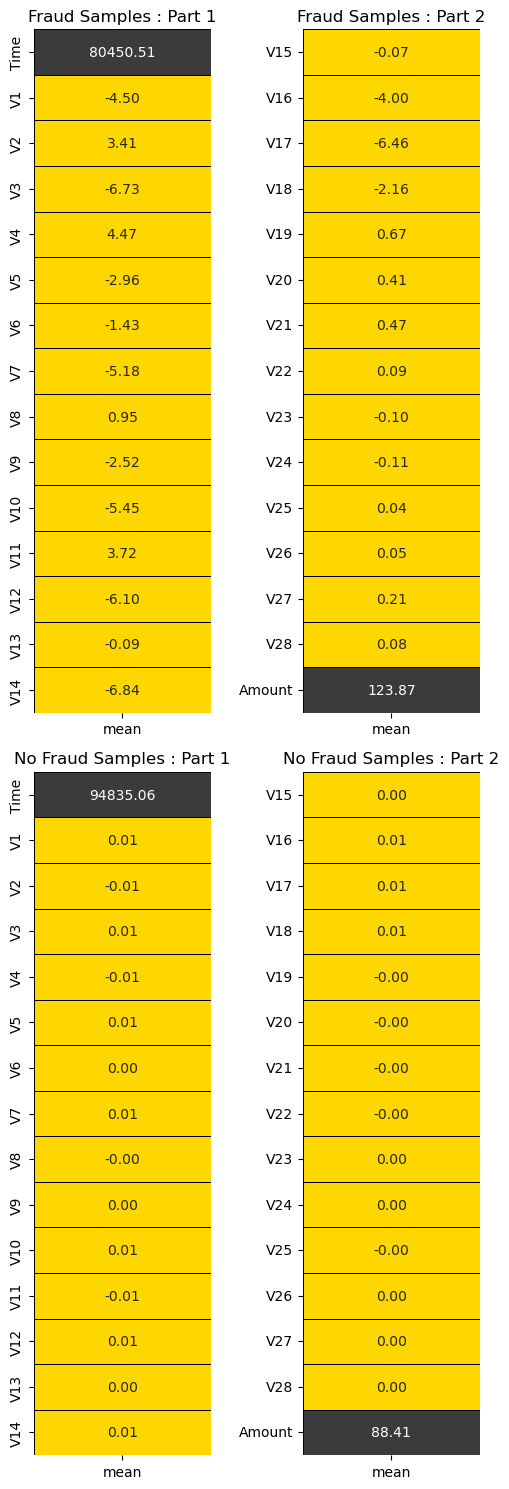

In [53]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

### Observations:
- **Mean** values of features for **Fraud** & **No Fraud** cases!
- For **No Fraud** cases, **V1 - V28** mean values are almost **0** for all the cases. Mean **Amount**, 88.29, is less than the mean transaction amount, 122.21, of the **Fraud** cases.
- **Time** taken for **No Fraud** transactions is more than those for **Fraud** transactions.
- These could be some of the indicators for detecting **fraud** transactions.

## 2. EDA

### Target Variable Visualization (Class) : 

/var/folders/lw/gh1k9l3x41g3swv5kwzbhhp00000gn/T/ipykernel_13454/519527971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class',data = data,edgecolor = 'black',palette = colors)
/var/folders/lw/gh1k9l3x41g3swv5kwzbhhp00000gn/T/ipykernel_13454/519527971.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Fraud','Fraud'])


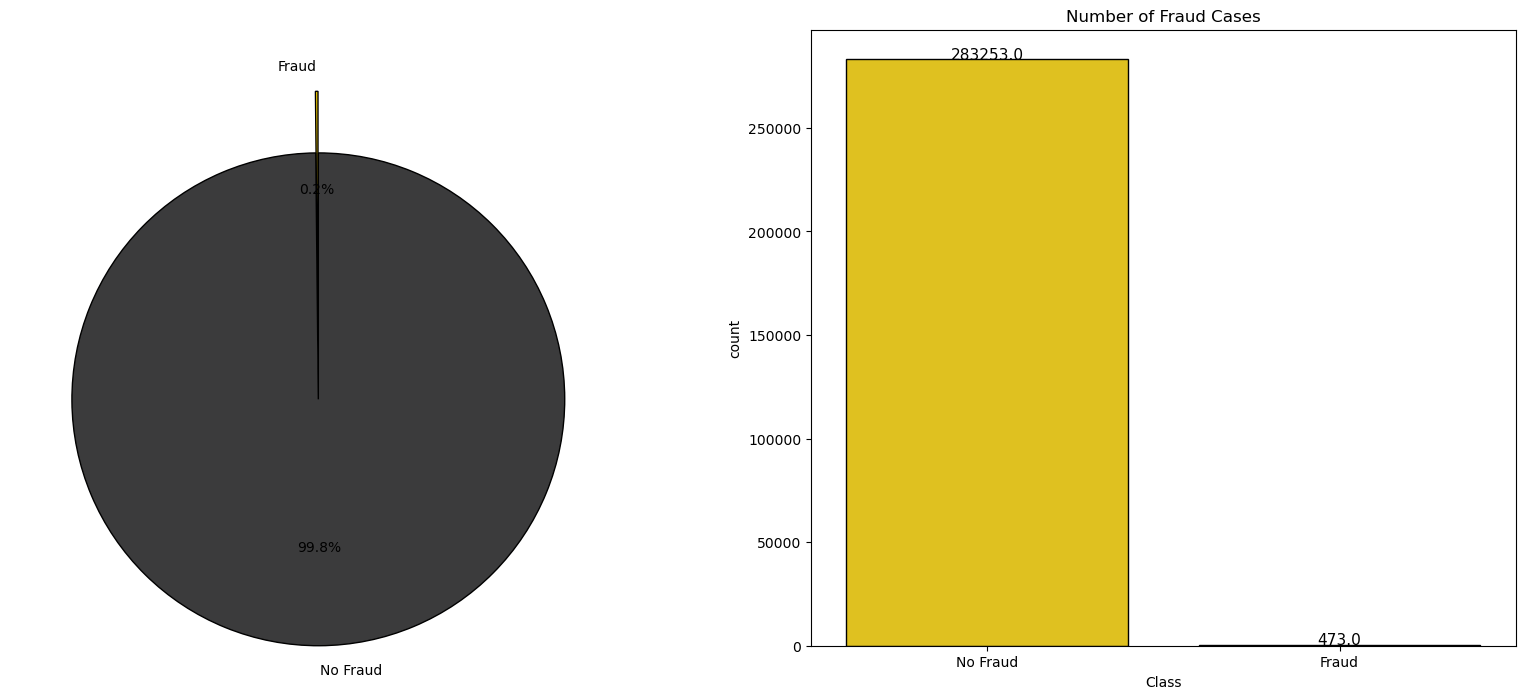

In [95]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [fraud,nofraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,8))
explode = (0, 0.25)  # 0.1 indicates the fraction of the radius to explode by

plt.subplot(1,2,1)
plt.pie(fraud_percentage,explode,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model bias its prediction towards the majority class i.e. **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

### Feature Selection

#### Correlation Matrix :

<Axes: >

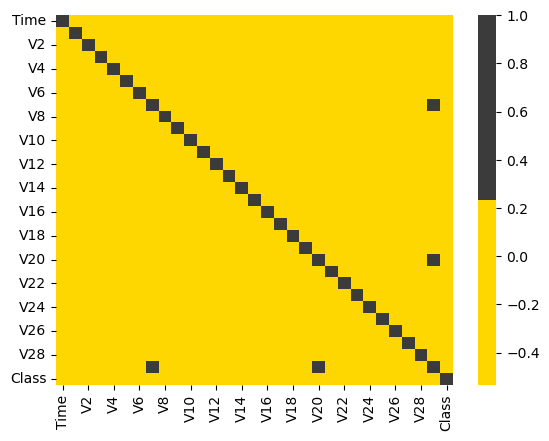

In [100]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

- There are too many features in the dataset and it is difficult to understand anything. 
- Hence, we will plot the correlation map only with the target variable.

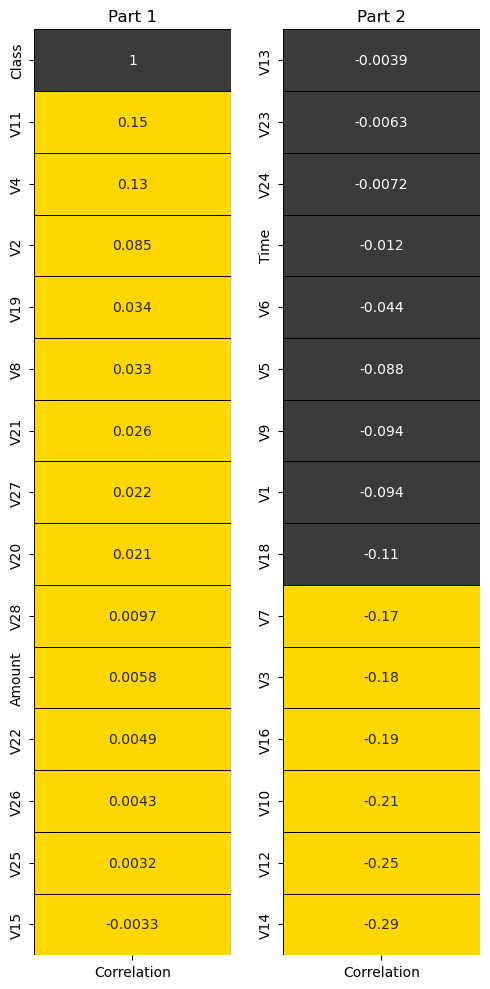

In [103]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation'] # corr ..> as Correlation column
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

- For feature selection, we will **exclude** the features having correlation values between **[-0.1,0.1]**.
- V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the **Class** feature.

In [106]:
corr

,Correlation
Class,1.00
V11,0.15
V4,0.13
V2,0.08
V19,0.03
V8,0.03
V21,0.03
V27,0.02
V20,0.02
V28,0.01


### ANOVA Test :

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

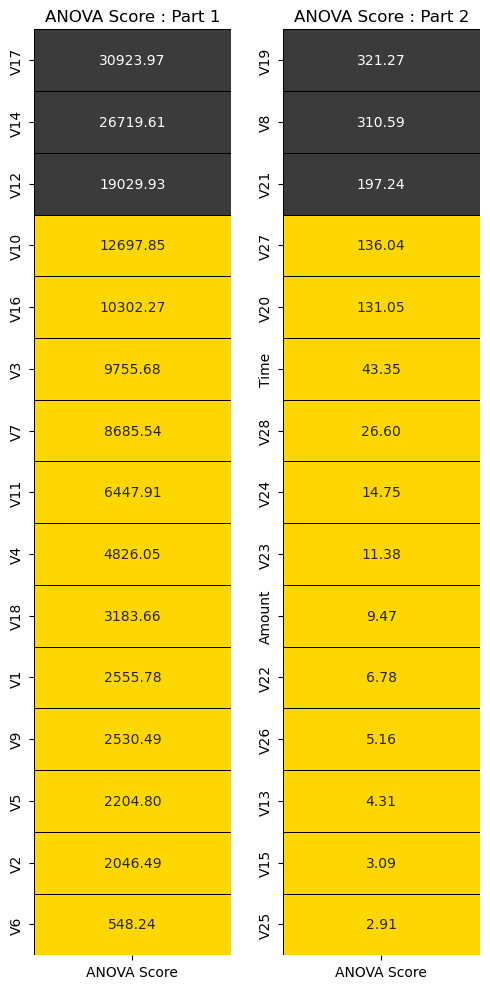

In [111]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

# Plotting 
plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

In [113]:
data.shape

(283726, 31)

In [115]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0


In [117]:
featureScores

,ANOVA Score
V17,30923.97
V14,26719.61
V12,19029.93
V10,12697.85
V16,10302.27
V3,9755.68
V7,8685.54
V11,6447.91
V4,4826.05
V18,3183.66


- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the **Correlation Plot** & **ANOVA Score**.

#### Dataset for the Model based on Correlation Plot :

In [121]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


In [123]:
df1.shape

(283726, 10)

#### Dataset for Model based on ANOVA Score :

In [126]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


In [128]:
df2.shape

(283726, 21)

#### Data Balancing
- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

In [131]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [134]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4730, 1: 2365})

#### Data Balancing for Model based on ANOVA Score :

In [137]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4730, 1: 2365})

### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Fraud Cases** : 284315 samples
    - **Minority Class : Fraud Cases** : 492 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 492 ) / Majority Class Samples
- After undersampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 492 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 0.5
- 0.5 = ( Minority Class Samples ) / 4920
- After oversampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples
    

- Final Class Samples :

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples


- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

## 3. Modeling

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [143]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Splitting the data into **80 - 20 train - test** groups.

In [146]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1) # For imbalance dataset stratified k-fold 
    
    # below line code get the cross-validiation score
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction))) # get AUC value
    
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))           # generate the confusion matrix
    names = ['True Neg','False Pos','False Neg','True Pos']            # labels for the matrix
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]    # flatten the cm to a list
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]  # zip the names, counts, % as labels
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')       # heat map representatio of cm
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test))) # generate a report i.e. presicion, recall, f1 & acc values

### 1] Logistic Regression :

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Model based on Correlation Plot :

Cross Validation Score :  97.96%
ROC_AUC Score :  93.70%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


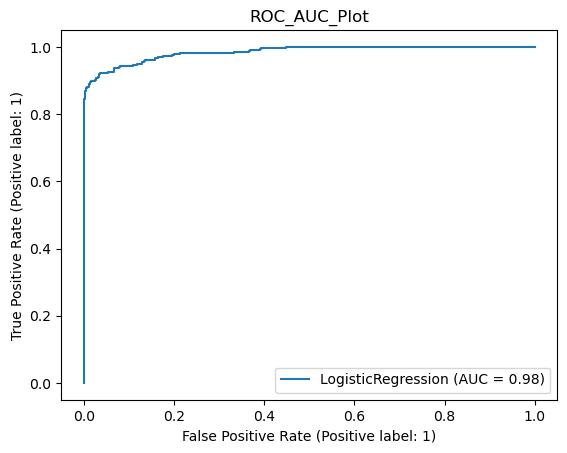

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.98      0.88      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.95      0.95      1476



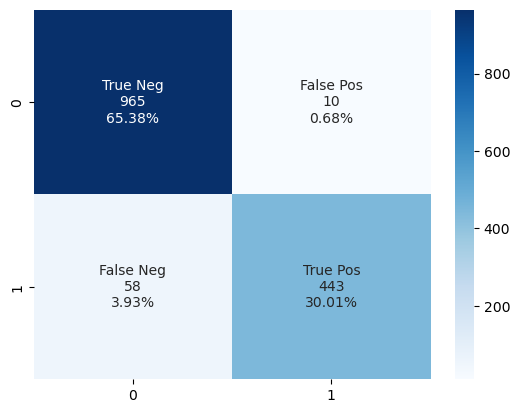

In [112]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score :  98.66%
ROC_AUC Score :  93.05%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


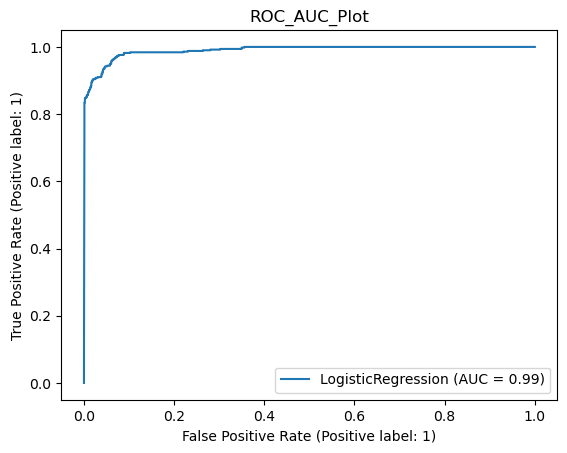

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



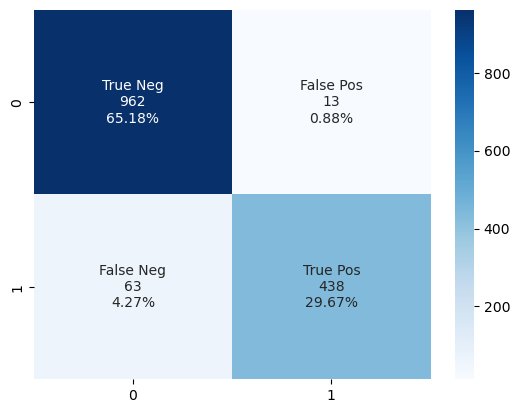

In [114]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

**Observations:** 
1. The features selected based on the Correlation and ANOVA Score showed almost same performance interms of confusion matrix values and ROC_AUC score.

### 2] Support Vector Classifier :

In [117]:
from sklearn.svm import SVC

In [118]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

#### Model based on Correlation Plot :

Cross Validation Score :  97.93%
ROC_AUC Score :  93.51%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


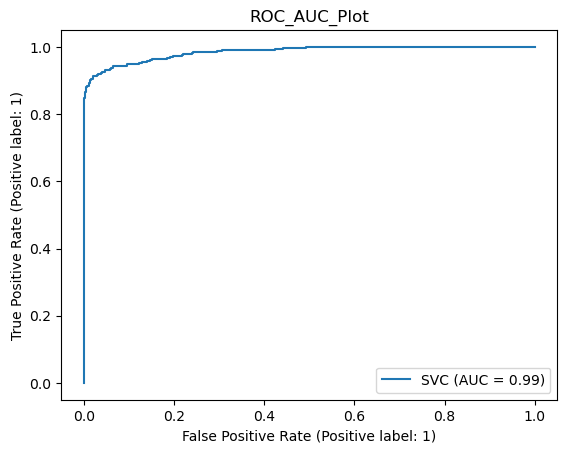

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.95      0.95      1476



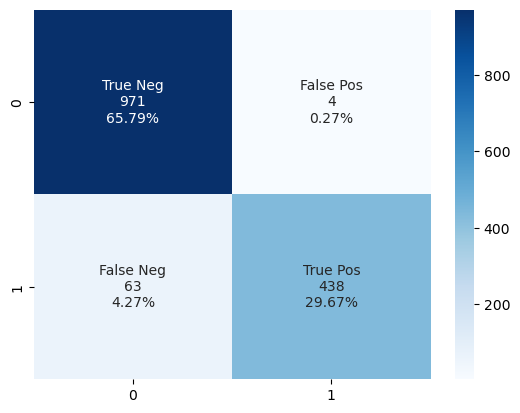

In [120]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score :  98.54%
ROC_AUC Score :  92.06%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


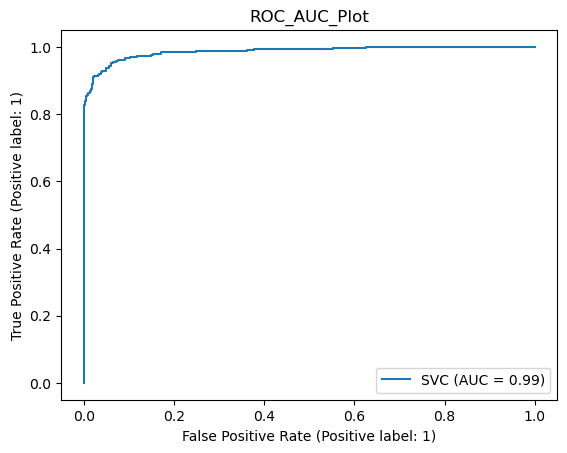

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.85      0.91       501

    accuracy                           0.94      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.94      0.94      1476



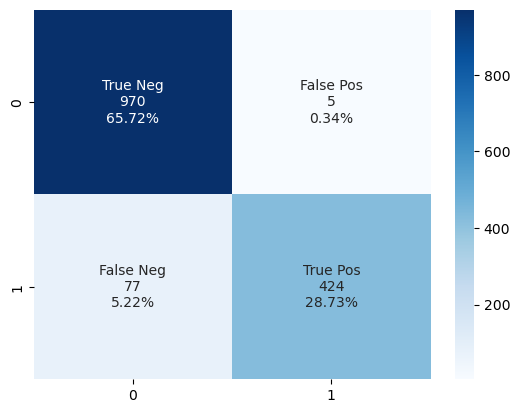

In [122]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### 3] Decision Tree Classifier :

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

#### Model based on Correlation Plot :

Cross Validation Score :  96.03%
ROC_AUC Score :  93.66%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


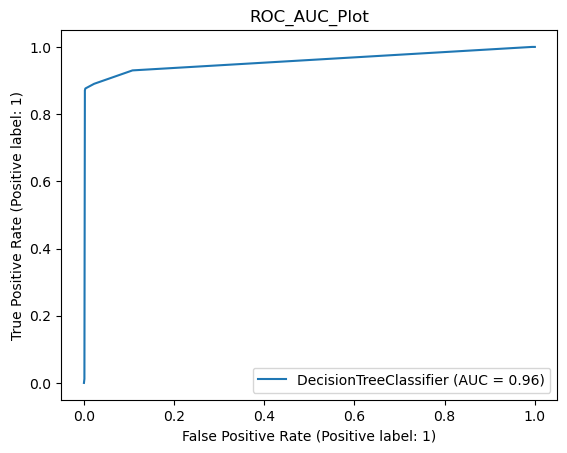

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



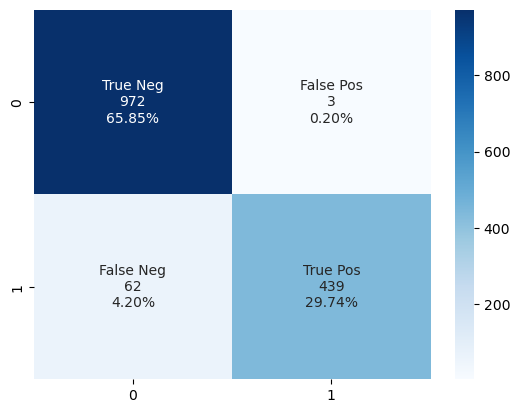

In [127]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score :  96.35%
ROC_AUC Score :  90.96%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


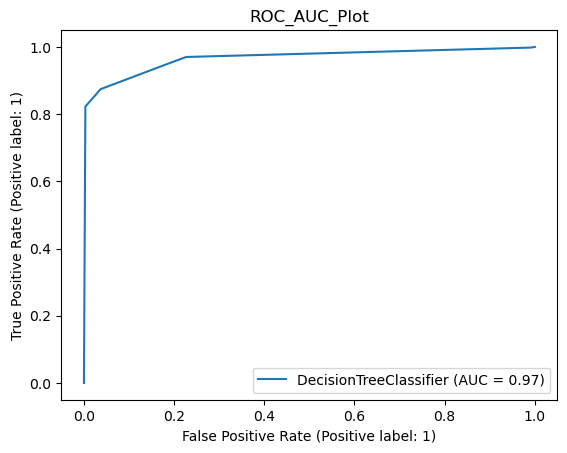

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       975
           1       0.99      0.82      0.90       501

    accuracy                           0.94      1476
   macro avg       0.95      0.91      0.93      1476
weighted avg       0.94      0.94      0.94      1476



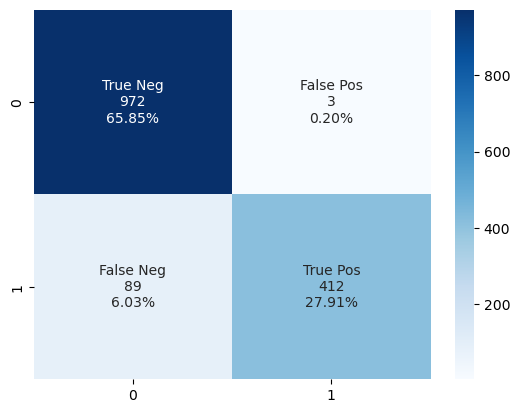

In [129]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### 4] Random Forest Classifier : 

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### Model based on Correlation Plot :

Cross Validation Score :  97.76%
ROC_AUC Score :  93.41%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


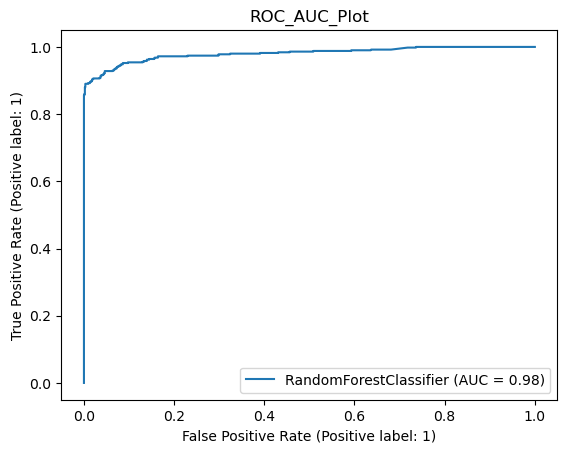

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       1.00      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.97      0.93      0.95      1476
weighted avg       0.96      0.95      0.95      1476



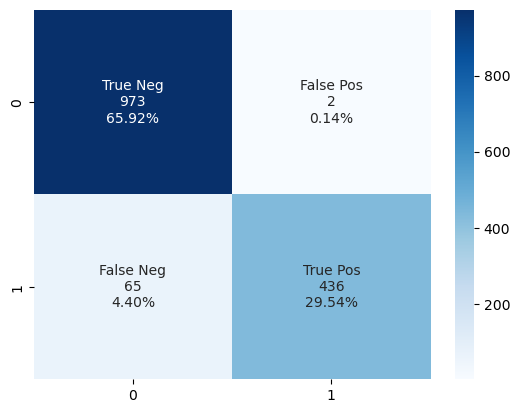

In [134]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score :  98.06%
ROC_AUC Score :  91.27%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


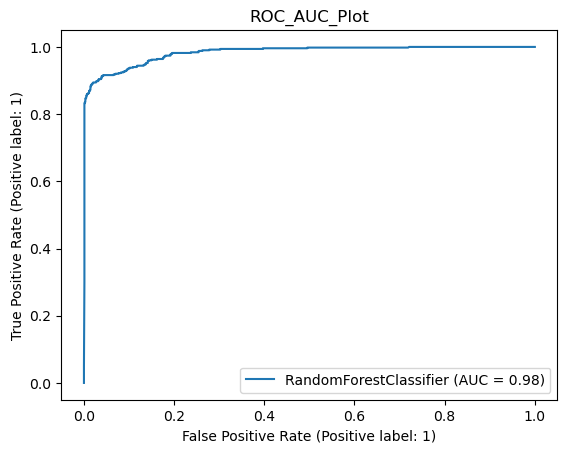

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       975
           1       1.00      0.83      0.90       501

    accuracy                           0.94      1476
   macro avg       0.96      0.91      0.93      1476
weighted avg       0.95      0.94      0.94      1476



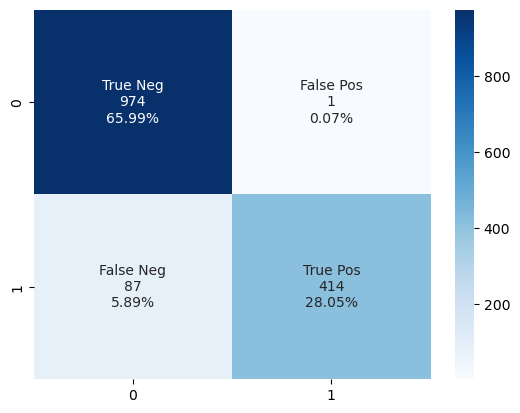

In [136]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### 5] K-Nearest Neighbors :

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

#### Model based on Correlation Plot :

Cross Validation Score :  99.22%
ROC_AUC Score :  97.89%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


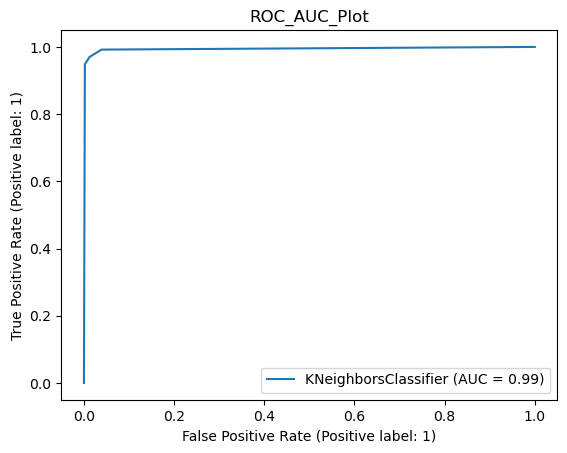

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       975
           1       0.98      0.97      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



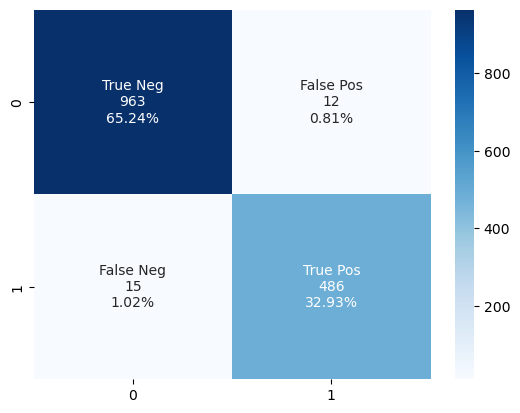

In [141]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

#### Model based on ANOVA Score :

Cross Validation Score :  99.59%
ROC_AUC Score :  99.03%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


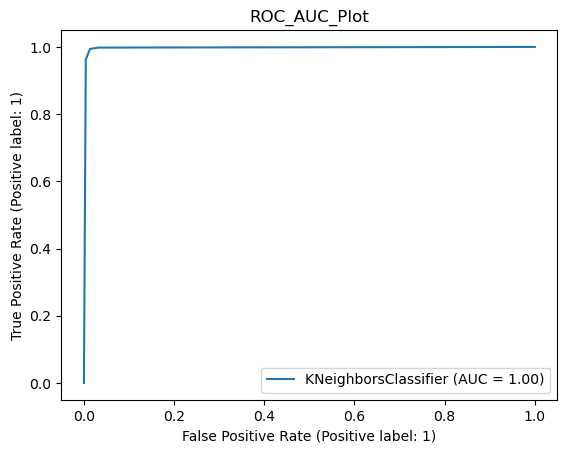

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476



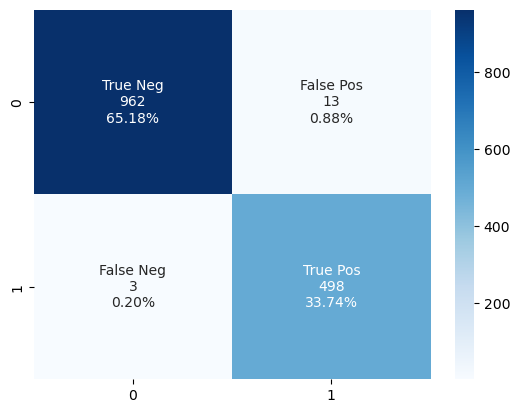

In [143]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

### ML Alogrithm Results Table :

#### Results Table for models based on Correlation Plot : 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|97.96%|93.70%|93%|
|2|Support Vector Classifier|97.93%|93.51%|93%|
|3|Decision Tree Classifier|96.03%|93.66%|93%|
|4|Random Forest Classifier|97.76%|93.41%|93%|
|5|K-Nearest Neighbors|99.22%|97.89%|97%|
 
#### Results Table for models based on ANOVA Score :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.66%|93.05%|92%|
|2|Support Vector Classifier|98.54%|92.06%|91%|
|3|Decision Tree Classifier|96.35%|90.96%|90%|
|4|Random Forest Classifier|98.06%|91.27%|90%|
|5|K-Nearest Neighbors|99.59%|99.03%|98%|

## Conclusions: 
- This is a great dataset to learn about binary classification problem with unbalanced data.


- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.  


- Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.